## Exercise 3 - **Car travel in 2 dimensions**

The goal of this exercise is to familiarise with:
- code structure `# Physics, # Numerics, # Time loop, # Visualisation`
- array initialisation
- `for` loop
- update rule
- `if` condition
- 2 spatial dimensions

Based on the experience you acquired solving the [Exercise 2](#exercise_2_-_car_travel) we can now consider a car moving within a 2-dimensional space. The car still travels at speed $V=113$ km/h, but now in North-East or North-West direction. The car's displacement in the West-East directions ($x$-axis) is limited to $L=200$ km. The speed in the North direction is constant remains constant.

Starting from the 1D code done in [Exercise 2](#exercise_2_-_car_travel), work towards adding the second spatial dimension. Now, the car's position $(x,y)$ as function of time $t$ has two components.

In [1]:
# Exercise 2 (for reference)
using Plots

@views function car_travel_1D(Δt)
    # Physical parameters
    V     = 113        # speed, km/h
    L     = 200        # length of segment, km
    ttot  = 16        # total time, h
    # Numerical parameters
    #dt (param)          # time step, h
    nt    = Int(cld(ttot, Δt))  # number of time steps
    # Array initialisation
    T     = zeros(nt)
    X     = zeros(nt)
    # Time loop
    for it = 2:nt
        T[it] = T[it-1] + Δt
        Δx = V*Δt
        X[it] = X[it-1] + Δx  # move the car
        if X[it] > L
            V = -abs(V)
        elseif X[it] < 0
            V = abs(V)
        end
    end
    # Visualisation
    display(scatter(T, X, markersize=5,
                    xlabel="time, hrs", ylabel="distance, km",
                    framestyle=:box, legend=:none))
    return
end

car_travel_1D (generic function with 1 method)

In [9]:
using Plots

@views function car_travel_2D(Δt)
    # Physical parameters
    V     = 113 .* [cos(π/4),sin(π/4)]        # speed, km/h, 2D
    L     = 200        # length of segment, km
    ttot  = 16        # total time, h
    # Numerical parameters
    #dt (param)          # time step, h
    nt    = Int(cld(ttot, Δt))  # number of time steps
    # Array initialisation
    T     = zeros(nt)
    X     = zeros(nt)
    Y     = zeros(nt)
    # Time loop
    for it = 2:nt
        T[it] = T[it-1] + Δt
        Δx, Δy = V .* Δt
        X[it] = X[it-1] + Δx  # move the car in the X dim
        Y[it] = Y[it-1] + Δy  # move the car in the Y dim
        if X[it] > L
            V = V .|> ((-) ∘ abs, abs)
        elseif X[it] < 0
            V = V .|> (abs,abs)
        end
    end
    # Visualisation
    display(scatter(X,Y, markersize=5,
                    xlabel="distance, km", ylabel="distance, km",
                    framestyle=:box, legend=:none, ylims=(0,ttot*V[2])))
    return
end

car_travel_2D (generic function with 1 method)

> 💡 hint:
> - Split velocity magnitude $V$ into $x$ and $y$ component
> - Use `sind()` or `cosd()` functions if passing the angle in _deg_ instead of _rad_
> - Use two vectors or an array to store the car's coordinates
> - Define the y-axis extend in the plot `ylims=(0, ttot*Vy)`

### Question 1

Visualise graphically the trajectory of the travelling car for a simulation with time step parameter defined as `dt = 0.1`.

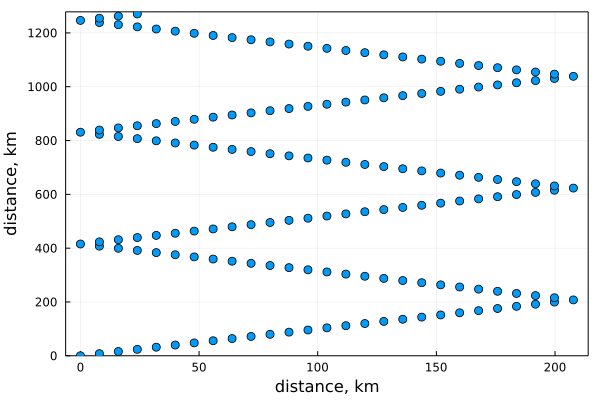

In [10]:
car_travel_2D(0.1)